In [1]:
# import statements
import torch
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def f(x):
    return (x - 1) * (x + 2) * (x - 3) * (x + 6)
# plotting of the function
x = torch.arange(-8, 5, 0.1)
y = f(x)
plt.plot(x, y)

# Objective: try to find a good x value, to make y small
x = torch.tensor(0.0, requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.01)   # minimizes by default

for epoch in range(10):
    y = f(x)
    plt.plot(x.detach(), y.detach(), "ro", markersize=3+epoch)
    y.backward()
    optimizer.step()
    optimizer.zero_grad()
x

## Train a Model using Iris dataset

<Axes: xlabel='petlen', ylabel='petwid'>

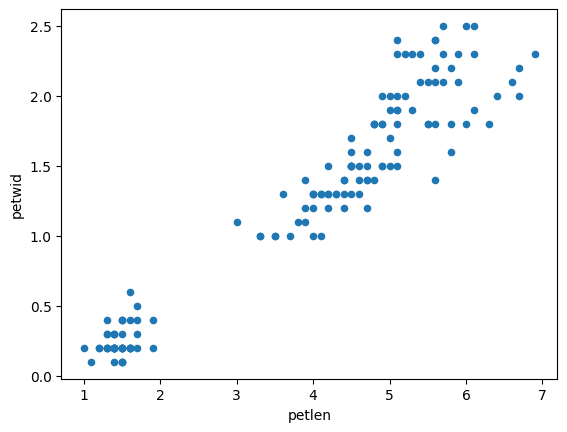

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 names=["seplen", "sepwid", "petlen", "petwid", "variety"])
df.plot.scatter(x="petlen", y="petwid")

DataFrame slicing and `numpy` conversion

Syntax:
- `<dataframe>.loc[<ROW SLICE>:<COL SLICE>]`
- `<dataframe>.values`

In [3]:
#df.loc[:, "seplen":"petlen"].values

In [4]:
# Create TensorDataset using two tensors for X values and Y values
ds = torch.utils.data.TensorDataset(
    torch.tensor(df.loc[:, "seplen":"petlen"].values), # X values
    torch.tensor(df.loc[:, ["petwid"]].values) # Y values
)

In [5]:
X, Y = ds[:5]

In [6]:
X

tensor([[5.1000, 3.5000, 1.4000],
        [4.9000, 3.0000, 1.4000],
        [4.7000, 3.2000, 1.3000],
        [4.6000, 3.1000, 1.5000],
        [5.0000, 3.6000, 1.4000]], dtype=torch.float64)

In [7]:
Y

tensor([[0.2000],
        [0.2000],
        [0.2000],
        [0.2000],
        [0.2000]], dtype=torch.float64)

In [8]:
# Spit train and test using 75%-25% split
train, test = torch.utils.data.random_split(ds, [0.75, 0.25])

In [9]:
batchX, batchY = train[0:5]
batchX

tensor([[6.5000, 3.2000, 5.1000],
        [6.4000, 3.2000, 4.5000],
        [5.6000, 2.7000, 4.2000],
        [5.2000, 2.7000, 3.9000],
        [7.7000, 3.8000, 6.7000]], dtype=torch.float64)

In [10]:
batchY

tensor([[2.0000],
        [1.5000],
        [1.3000],
        [1.4000],
        [2.2000]], dtype=torch.float64)

In [11]:
# DataLoader - creates batches while handling shuffling
dl = torch.utils.data.DataLoader(train, batch_size=5, shuffle=True)

In [16]:
# Let's print just the first batch
for batchX, batchY in dl:
    print(batchX)
    print(batchY)
    break

tensor([[6.1000, 2.6000, 5.6000],
        [5.7000, 2.6000, 3.5000],
        [4.7000, 3.2000, 1.3000],
        [5.0000, 3.3000, 1.4000],
        [4.8000, 3.4000, 1.6000]], dtype=torch.float64)
tensor([[1.4000],
        [1.0000],
        [0.2000],
        [0.2000],
        [0.2000]], dtype=torch.float64)


In [17]:
# X's shape
batchX.shape

torch.Size([5, 3])

In [18]:
# Y's shape
batchY.shape

torch.Size([5, 1])

Let's initialize our co-efficients tensor using zero values. What should the shape be?

In [19]:
coef = torch.zeros((3, 1), dtype=torch.float64)
coef

tensor([[0.],
        [0.],
        [0.]], dtype=torch.float64)

Let's apply matrix multiplication for making our initial predictions.

In [20]:
predictions = batchX @ coef # we need double precision float
predictions

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=torch.float64)

#### Loss function - MSELoss

In [21]:
loss_fn = torch.nn.MSELoss()
coef = torch.zeros((3, 1), dtype=torch.float64, requires_grad=True)
optimizer = torch.optim.SGD([coef], lr=0.001)

for epoch in range(100):
    for batchX, batchY in dl:
        predictions = batchX @ coef
        loss = loss_fn(predictions, batchY)
        loss.backward()   # computes gradient, and adds it to coef.grad
        optimizer.step()
        optimizer.zero_grad()

    X, Y = train[:]
    print(loss_fn(X @ coef, Y))

tensor(0.2658, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.2240, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1943, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1720, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1546, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1379, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1250, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1126, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1034, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0955, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0883, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0822, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0775, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0733, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0696, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0683, dtype=torch.float64, grad

Final step - check MSE using test dataset

In [23]:
X, Y = test[:]
print(loss_fn(X @ coef, Y))

tensor(0.0405, dtype=torch.float64, grad_fn=<MseLossBackward0>)
